# Wstęp do Sztucznej Inteligencji - rok akademicki 2022/2023

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 2 - Zadania (obowiązkowe)

## Wielowarstwowe sieci jednokierunkowe
Cechą charakterystyczną sieci jednokierunkowych wielowarstwowych jest występowanie, co najmniej jednej warstwy ukrytej neuronów, która pośredniczy w przekazywaniu sygnałów między węzłami w warstwie wejściowej, a warstwą wyjściową.

### Architektura
![MLPnet.gif](http://torus.uck.pk.edu.pl/~amarsz/images/MLPnet.gif)
- Sygnały wejściowe podawane są na pierwszą warstwę ukrytą neuronów, a te z kolei stanowią sygnały źródłowe dla kolejnej warstwy itd. aż do warstwy wyjściowej.
- W sieci tej występują zazwyczaj pełne połączenia między warstwami tzn. każdy neuron następnej warstwy jest połączony z każdym neuronem warstwy poprzedniej. 
- Neurony warstw ukrytych stanowią bardzo istotny element sieci, umożliwiający uwzględnienie związków między sygnałami, wynikającymi z zależności statystycznych wyższego rzędu.

### Uczenie
Uczenie sieci MLP odbywa się zwykle z nauczycielem, a najpopularniejszą metodą uczenia jest algorytm wstecznej propagacji błędu. Algorytm wstecznej propagacji - BackPropagation (BP) określa strategię doboru wag w sieci wielowarstwowej przy wykorzystaniu gradientowych metod optymalizacji. Podczas procesu uczenia sieci dokonuje się prezentacji pewnej ilości zestawów uczących (tzn. wektorów wejściowych oraz odpowiadających im wektorów sygnałów wzorcowych (wyjściowych)). Uczenie polega na takim doborze wag neuronów by w efekcie końcowy błąd popełniany przez sieć był mniejszy od zadanego.

## Ciągłe funkcje aktywacji. Neurony sigmoidalne.
Wykorzystując do uczenia algorytm wstecznej propagacji błędu należy obliczyć pochodne cząstkowe względem wag, co zmusza nas do stosowanie ciągłych (różniczkowalnych) funkcji aktywacji. Najczęściej stosowane są wówczas _neurony sigmoidalne_, których budowa jest prawie taka sama jak perceptronu z tą różnicą, że zamiast progowej funkcji aktywacji wykorzystuje sie ciągłe funkcje sigmoidalne (unipolarną lub bipolarną).

Funkcje sigmoidalne odpowiednio unipolarna i bipolarna:

![sigmoidalne.png](http://torus.uck.pk.edu.pl/~amarsz/images/sigmoidalne.png)

Parametr $\beta$ pozwala na modyfikację nachylenia funkcji sigmoidalnych.

Popularność tych funkcji spowodowana jest łatwością obliczania ich pochodnych, co jest konieczne przy użyciu algorytmów uczenia opartych na podejściu gradientowym. Wartości pochodnych dla powyższych funkcji łatwo obliczyć znając jedynie wartości samych funkcji.
$$f'_1(x)=\frac{\beta e^{-\beta x}}{\left(1-e^{-\beta x}\right)^2}=\beta f_1(x)\left(1-f_1(x)\right)$$

$$f'_2(x)=\beta-\beta\left(\frac{\left(e^{\beta x}-e^{-\beta x}\right)^2}{\left(e^{\beta x}+e^{-\beta x}\right)^2}\right)=\beta \left(1-f_2(x)^2\right)$$


## Algorytm wstecznej propagacji błędu
Dla uproszczenia rozważymy przypadek sieci z jedną warstwą ukrytą, której schemat wraz z oznaczeniami przedstawia poniższy rysunek.
![mlp1h.png](http://torus.uck.pk.edu.pl/~amarsz/images/mlp1h.png)

- Wektor sygnałów wejściowych $x=[1, x_1, x_2, \ldots, x_N]$.
- Macierz $W^{(1)}$ o rozmiarach $K\times(N+1)$ zawiera wartości wag między sygnałami wejściowymi a warstwą ukrytą, gdzie $w^{(1)}_{kn}$ oznacza wagę pomiędzy $k$-tym neuronem warstwy ukrytej a $n$-tym sygnałem wejściowym.
- Macierz $W^{(2)}$ o rozmiarach $M\times(K+1)$ zawiera wartości wag między warstwą ukrytą a warstwą wyjąciową, gdzie $w^{(2)}_{mk}$ oznacza wagę pomiędzy $m$-tym neuronem warstwy wyjściowej a $k$-tym neuronem warstwy ukrytej.
- Wektor pożądanych odpowiedzi $x=[d_1, d_2, \ldots, d_M]$.

Wówczas błąd dla jednego przykładu uczącego wyraża się wzorem:

$$E(W) = \frac{1}{2}\sum\limits_{m=1}^M\left[y_m - d_m\right]^2$$

przy czym $y_m$ wyraża się wzorem:

$$ y_m = G\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right) = G\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot F\left(\sum\limits_{n=0}^N{w^{(1)}_{kn}\cdot x_n}\right)\right)$$

gdzie funkcje $F$ i $G$ to funkcje aktywacji odpowiednio w warstwie ukrytej i wyjściowej.

### Aktualizacja wag warstwy wyjściowej $W^{(2)}$
Poprawa wag odbywa się w kierunku przeciwnym do gradienu (wektora pochodnych), $\eta$ - współczynnik uczenia:

$$ w^{(2)}_{mk} = w^{(2)}_{mk} - \eta\cdot\frac{\partial E(W)}{\partial w^{(2)}_{mk}} $$

gdzie 

$$ \frac{\partial E(W)}{\partial w^{(2)}_{mk}} = (y_m - d_m)\cdot G'\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right)\cdot v_k $$

### Aktualizacja wag warstwy ukrytej $W^{(1)}$
Poprawa wag odbywa według tej samej zasady co poprzednio, $\eta$ - współczynnik uczenia:

$$ w^{(1)}_{kn} = w^{(1)}_{kn} - \eta\cdot\frac{\partial E(W)}{\partial w^{(1)}_{kn}} $$

gdzie 

$$ \frac{\partial E(W)}{\partial w^{(1)}_{kn}} = \sum\limits_{m=1}^M\left[(y_m - d_m)\cdot G'\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right)\cdot w^{(2)}_{mk}\cdot F'\left(\sum\limits_{n=0}^N{w^{(1)}_{kn}\cdot x_n}\right)\cdot x_n\right]$$

## Problem XOR
Poniższy rysunek (po lewej) ilustruje spójnik logiczny XOR. Aby zrealizować spójnik XOR za pomocą sieci neuronowej, wewnątrz zakreślonego obszaru sieć powinna odpowiadać sygnałem równym 1, natomiast na zewnątrz sygnałem równym 0. 
![xor.png](http://torus.uck.pk.edu.pl/~amarsz/images/xor.png)

Takiego warunku nie można spełnić stosując podział obszaru przy użyciu jednej prostej (jednego neuronu) niezależnie od wartości współczynników tej prostej. Problem XOR nie należy zatem do klasy problemów liniowo separowalnych i nie da się go rozwiązać za pomocą sieci jednowarstwowej.

Problem XOR w łatwy sposób daje się rozwiązać oddzielając klasy od siebie za pomocą dwóch prostych. Każda z tych prostych reprezentuje jeden neuron, którego wagi dobieramy tak, aby realizowały podział przestrzeni tak jak na rysunku powyżej (po prawej). Dokładając trzeci neuron, którego wejściami są wyjścia poprzednich neuronów otrzymujemy odpowiedź czy znajdujemy się wewnątrz czy na zewnątrz zaznaczonego obszaru.

Przykładowy przebieg uczenia sieci klasyfikującej dane typu XOR. 
![xor_mlp.gif](http://torus.uck.pk.edu.pl/~amarsz/images/xor_mlp.gif)

## Zadanie 2 
- Zaimplementuj (w postaci funkcji) sieć neuronową o architekturze przedstawionej na poniższym rysunku.
![zad1.png](http://torus.uck.pk.edu.pl/~amarsz/images/zad1.png)
- Dla neuronów warstwy ukrytej jako funkcję aktywacji przyjmij bipolarną funkcję sigmoidalną.
- Dla neuronu warstwy wyjściowej jako funkcję aktywacji przyjmij unipolarną funkcję sigmoidalną.
- Implementację wykonaj na reprezentacji wektorowo-macierzowej.
- Funkcja powinna zwracać odpowiedź 

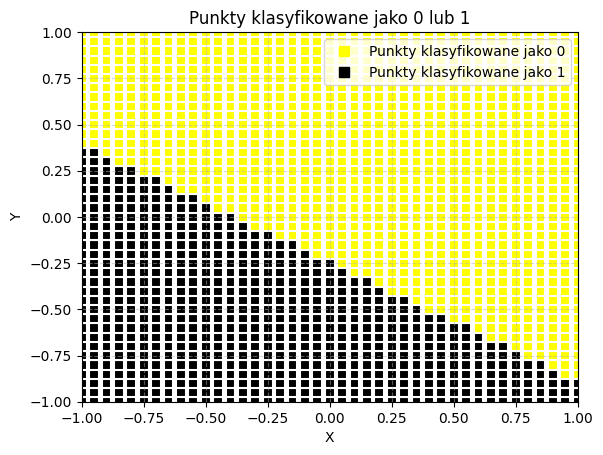

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

def tanh(x, beta):
    return np.tanh(beta * x)

def mlp(x, w1, w2, beta):

    signal = np.dot(x, w1)
    v_1 = tanh(signal[0], beta[0])
    v_2 = tanh(signal[1], beta[0])

    out = [1, v_1, v_2]
    
    output = sigmoid(np.dot(out, w2), beta[1])
    
    return output

def klasyfikatorMLP(x, w1, w2, beta, prog=0.5):
    output = mlp(x, w1, w2, beta)
    if output >= prog:
        return 1
    else:
        return 0

# Definiujemy wagi i parametr funkcji aktywacji
x = np.array([1, 0.5, -0.5])
w1 = [[1, 2], [3, 4], [5, 6]]
w2 = [1, 2, 3]
beta = [-1, 1]

# Generujemy punkty na płaszczyźnie w zakresie [-1, 1]
x_wartosci = np.arange(-1, 1.1, 0.05)
y_wartosci = np.arange(-1, 1.1, 0.05)
X, Y = np.meshgrid(x_wartosci, y_wartosci)

# Spłaszczamy punkty i klasyfikujemy je
punkty = np.vstack([X.ravel(), Y.ravel()]).T
klasyfikacje = np.array([klasyfikatorMLP([1, xi, yi], w1, w2, beta, 0.5) for xi, yi in punkty])

# Przypisujemy kolor dla punktów
kolory = ['yellow' if c == 0 else 'black' for c in klasyfikacje]

plt.scatter(punkty[:, 0], punkty[:, 1], c=kolory, marker='s', s=50, edgecolors='white', linewidths=1.5)

# Definiujemy granice i etykiety
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Punkty klasyfikowane jako 0 lub 1')

# Dodajemy siatkę oraz legendę
plt.grid(True, linestyle='--', alpha=0.5)
blue_patch = plt.Line2D([], [], marker='s', color='yellow', linestyle='None', markersize=7, label='Punkty klasyfikowane jako 0')
red_patch = plt.Line2D([], [], marker='s', color='black', linestyle='None', markersize=7, label='Punkty klasyfikowane jako 1')
plt.legend(handles=[blue_patch, red_patch], loc='upper right')


plt.show()

&copy; Katedra Informatyki, Politechnika Krakowska